# Getting the Data

In [1]:
#importing libraries for csv and json
# Run this cell without changes
import json
import csv

In [2]:
# Opening csv and json files
# Run this cell without changes
world_cup_file = open("worldcup.json", encoding='utf8')
population_file = open("population_csv.csv")

# Loading data

In [3]:
# Loading json file to a new variable
# Replace None with appropriate code
world_cup_data = json.load(world_cup_file)

# Close the file now that we're done reading from it
world_cup_file.close()

In [4]:
#Double checking that the file works
# Run this cell without changes

# Check that the overall data structure is a dictionary
assert type(world_cup_data) == dict

# Check that the dictionary has 2 keys, 'name' and 'rounds'
assert list(world_cup_data.keys()) == ['name', 'rounds']

# Population Data

In [5]:
# Loading csv file to a new variable
# Replace None with appropriate code
population_data = list(csv.DictReader(population_file))

# Close the file now that we're done reading from it
population_file.close()

In [6]:
#Double checking that the file works
# Run this cell without changes

# Check that the overall data structure is a list
assert type(population_data) == list

# Check that the 0th element is a dictionary
# (csv.DictReader interface differs slightly by Python version;
# either a dict or an OrderedDict is fine here)
from collections import OrderedDict
assert type(population_data[0]) == dict or type(population_data[0]) == OrderedDict

# 1. List of Teams in 2018 World Cup

In [7]:
#checking first keys in json
# Run this cell without changes
world_cup_data.keys()

dict_keys(['name', 'rounds'])

In [8]:
#Data values in key Name
# Run this cell without changes
world_cup_data["name"]

'World Cup 2018'

# Extracting rounds

In [9]:
# putting variable in Rounds and identifying general inforamtion
# Run this cell without changes
rounds = world_cup_data["rounds"]

print("type(rounds):", type(rounds))
print("len(rounds):", len(rounds))
print("type(rounds[3])", type(rounds[3]))
print("rounds[3]:")
rounds[3]

type(rounds): <class 'list'>
len(rounds): 20
type(rounds[3]) <class 'dict'>
rounds[3]:


{'name': 'Matchday 4',
 'matches': [{'num': 9,
   'date': '2018-06-17',
   'time': '21:00',
   'team1': {'name': 'Brazil', 'code': 'BRA'},
   'team2': {'name': 'Switzerland', 'code': 'SUI'},
   'score1': 1,
   'score2': 1,
   'score1i': 1,
   'score2i': 0,
   'goals1': [{'name': 'Coutinho', 'minute': 20, 'score1': 1, 'score2': 0}],
   'goals2': [{'name': 'Zuber', 'minute': 50, 'score1': 1, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'rostov', 'name': 'Rostov Arena'},
   'city': 'Rostov-on-Don',
   'timezone': 'UTC+3'},
  {'num': 10,
   'date': '2018-06-17',
   'time': '16:00',
   'team1': {'name': 'Costa Rica', 'code': 'CRC'},
   'team2': {'name': 'Serbia', 'code': 'SRB'},
   'score1': 0,
   'score2': 1,
   'score1i': 0,
   'score2i': 0,
   'goals1': [],
   'goals2': [{'name': 'Kolarov', 'minute': 56, 'score1': 0, 'score2': 1}],
   'group': 'Group E',
   'stadium': {'key': 'samara', 'name': 'Samara Arena'},
   'city': 'Samara',
   'timezone': 'UTC+4'},
  {'num': 11,
   

# Extracting matches

In [10]:
#getting matches data into list variable
# Replace None with appropriate code
matches = []

# "round" is a built-in function in Python so we use "round_" instead
for round_ in rounds:
    # Extract the list of matches for this round
    round_matches = list(round_["matches"])
    # Add them to the overall list of matches
    matches.extend(round_matches)

matches[0]

{'num': 1,
 'date': '2018-06-14',
 'time': '18:00',
 'team1': {'name': 'Russia', 'code': 'RUS'},
 'team2': {'name': 'Saudi Arabia', 'code': 'KSA'},
 'score1': 5,
 'score2': 0,
 'score1i': 2,
 'score2i': 0,
 'goals1': [{'name': 'Gazinsky', 'minute': 12, 'score1': 1, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 43, 'score1': 2, 'score2': 0},
  {'name': 'Dzyuba', 'minute': 71, 'score1': 3, 'score2': 0},
  {'name': 'Cheryshev', 'minute': 90, 'offset': 1, 'score1': 4, 'score2': 0},
  {'name': 'Golovin', 'minute': 90, 'offset': 4, 'score1': 5, 'score2': 0}],
 'goals2': [],
 'group': 'Group A',
 'stadium': {'key': 'luzhniki', 'name': 'Luzhniki Stadium'},
 'city': 'Moscow',
 'timezone': 'UTC+3'}

In [11]:
#checking if data is correct
# Run this cell without changes

# There should be 64 matches. If the length is 20, that means
# you have a list of lists instead of a list of dictionaries
assert len(matches) == 64

# Each match in the list should be a dictionary
assert type(matches[0]) == dict

# Extracting teams

In [12]:
#There are two teams in team1 and team2
# Run this cell without changes
print(matches[0]["team1"])
print(matches[0]["team2"])

{'name': 'Russia', 'code': 'RUS'}
{'name': 'Saudi Arabia', 'code': 'KSA'}


In [14]:
#Using set we extract the teams
# Replace None with appropriate code
teams_set = set()

for match in matches:
    # Add team1 name value to teams_set
    teams_set.add(match['team1']['name'])
    # Add team2 name value to teams_set
    teams_set.add(match['team2']['name'])

teams = sorted(list(teams_set))
print(teams)

['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France', 'Germany', 'Iceland', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Uruguay']


In [15]:
#checking if the data is correct
# Run this cell without changes

# teams should be a list, not a set
assert type(teams) == list

# 32 teams competed in the 2018 World Cup
assert len(teams) == 32

# Each element of teams should be a string
# (the name), not a dictionary
assert type(teams[0]) == str

# 2. Associating Countries with 2018 World Cup Performance

# Initializing with Wins Set to Zero

In [17]:
#creating a dictionary
# Replace None with appropriate code

# Create the variable combined_data as described above
combined_data = {}

for team in teams:
    combined_data[team] = {"wins": 0}

In [18]:
#checking if correct
# Run this cell without changes

# combined_data should be a dictionary
assert type(combined_data) == dict

# the keys should be strings
assert type(list(combined_data.keys())[0]) == str

# the values should be dictionaries
assert combined_data["Japan"] == {"wins": 0}

# Adding Wins from Matches

In [19]:
#writing a function winner
# Replace None with appropriate code

def find_winner(match):
    if match['score1' ] > match['score2']:
        return match['team1']['name']
    elif match['score1' ] < match['score2']:
        return match['team2']['name']
    elif match['score1' ] == match['score2']:
        None

In [20]:
#checking 
# Run this cell without changes
assert find_winner(matches[0]) == "Russia"
assert find_winner(matches[1]) == "Uruguay"
assert find_winner(matches[2]) == None

In [21]:
#updating combined_data code with wins
# Replace None with appropriate code

for match in matches:
    # Get the name of the winner
    winner = find_winner(match)
    # Only proceed to the next step if there was
    # a winner
    if winner:
        # Add 1 to the associated count of wins
        combined_data[winner]["wins"] += 1
    elif winner == None:
        continue

# Visually inspect the output to ensure the wins are
# different for different countries
combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

# Analysis of wins

In [23]:
# Statistical Summary of Wins, calculates the mean, median, and standard deviation
# Run this cell without changes
import numpy as np

wins = [val["wins"] for val in combined_data.values()]

print("Mean number of wins:", np.mean(wins))
print("Median number of wins:", np.median(wins))
print("Standard deviation of number of wins:", np.std(wins))

Mean number of wins: 1.5625
Median number of wins: 1.0
Standard deviation of number of wins: 1.5194057226429023


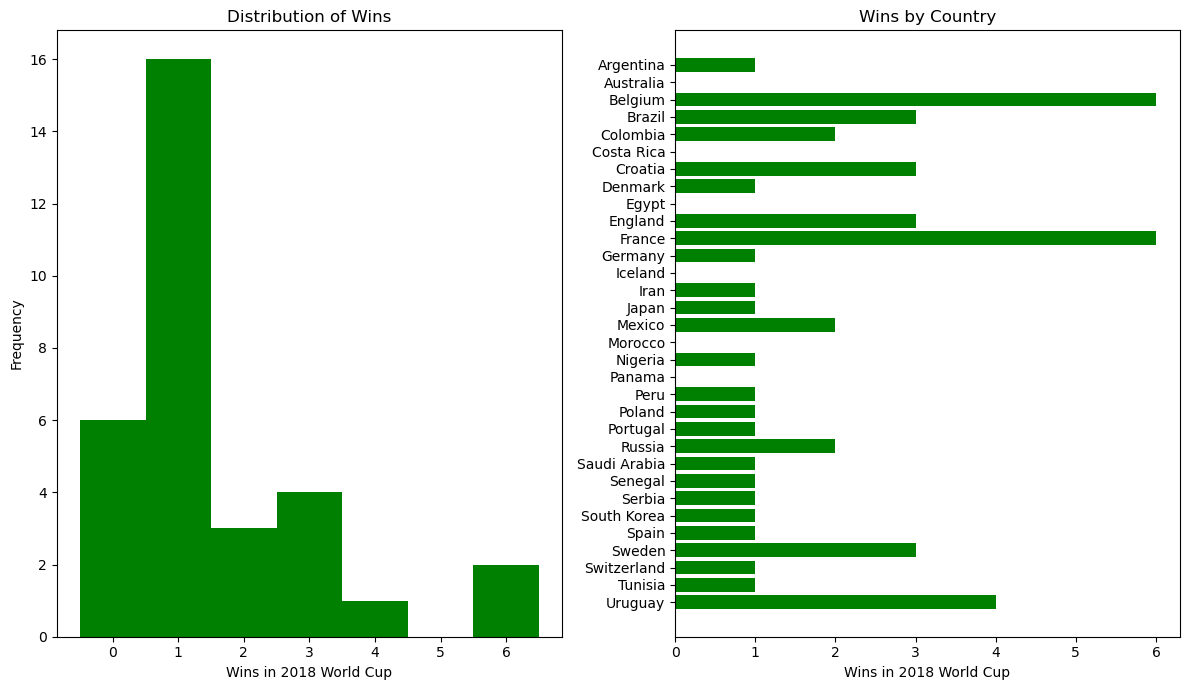

In [24]:
#Visualizations of Wins, histogram
# Run this cell without changes
import matplotlib.pyplot as plt

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Wins and Frequencies
ax1.hist(x=wins, bins=range(8), align="left", color="green")
ax1.set_xticks(range(7))
ax1.set_xlabel("Wins in 2018 World Cup")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Wins")

# Horizontal Bar Graph of Wins by Country
ax2.barh(teams[::-1], wins[::-1], color="green")
ax2.set_xlabel("Wins in 2018 World Cup")
ax2.set_title("Wins by Country");

# 3. Associating Countries with 2018 Population

# Exploring the Structure of the Population Data CSV

In [25]:
#working on csv now
# Run this cell without changes
len(population_data)

15409

In [26]:
#checking a sample cell 42
# Run this cell without changes
np.random.seed(42)
population_record_samples = np.random.choice(population_data, size=10)
population_record_samples

array([{'Country Name': 'Greenland', 'Country Code': 'GRL', 'Year': '1980', 'Value': '50200'},
       {'Country Name': 'High income', 'Country Code': 'HIC', 'Year': '1994', 'Value': '1034461319'},
       {'Country Name': 'Congo, Rep.', 'Country Code': 'COG', 'Year': '1981', 'Value': '1830632'},
       {'Country Name': 'St. Lucia', 'Country Code': 'LCA', 'Year': '2004', 'Value': '161816'},
       {'Country Name': 'China', 'Country Code': 'CHN', 'Year': '2018', 'Value': '1392730000'},
       {'Country Name': 'Poland', 'Country Code': 'POL', 'Year': '2016', 'Value': '37970087'},
       {'Country Name': 'North Macedonia', 'Country Code': 'MKD', 'Year': '1985', 'Value': '1981534'},
       {'Country Name': 'Cyprus', 'Country Code': 'CYP', 'Year': '1971', 'Value': '620859'},
       {'Country Name': 'Equatorial Guinea', 'Country Code': 'GNQ', 'Year': '1971', 'Value': '298846'},
       {'Country Name': 'Euro area', 'Country Code': 'EMU', 'Year': '2013', 'Value': '337302113'}],
      dtype=objec

# Filtering Population Data

In [27]:
#Getting population data country name and value down to 32 values
# Replace None with appropriate code

population_data_filtered = []

for record in population_data:
    # Add record to population_data_filtered if relevant
    for team in teams:
        if record['Country Name'] == team and record["Year"] == "2018":
            population_data_filtered.append(record)

len(population_data_filtered) # 27

27

In [28]:
#This was meant to be 'Iran, Islamic Rep.' 
# Run this cell without changes
population_record_samples[2]

{'Country Name': 'Congo, Rep.',
 'Country Code': 'COG',
 'Year': '1981',
 'Value': '1830632'}

In [29]:
#shows "Iran"
# Run this cell without changes
teams[13]

'Iran'

# Normalizing Locations in Population Data

In [30]:
#Function to get missing values
# Run this cell without changes
def normalize_location(country_name):
    """
    Given a country name, return the name that the
    country uses when playing in the FIFA World Cup
    """
    name_sub_dict = {
        "Russian Federation": "Russia",
        "Egypt, Arab Rep.": "Egypt",
        "Iran, Islamic Rep.": "Iran",
        "Korea, Rep.": "South Korea",
        "United Kingdom": "England"
    }
    # The .get method returns the corresponding value from
    # the dict if present, otherwise returns country_name
    return name_sub_dict.get(country_name, country_name)

# Example where normalized location is different
print(normalize_location("Russian Federation"))
# Example where normalized location is the same
print(normalize_location("Argentina"))

Russia
Argentina


In [31]:
#doing filter again with normalized function
# Replace None with appropriate code

population_data_filtered = []

for record in population_data:
    # Get normalized country name
    new_name = normalize_location(record['Country Name'])
    # Add record to population_data_filtered if relevant
    for team in teams:
        if record['Country Name'] == team and record["Year"] == "2018":
            population_data_filtered.append(record)
        # Replace the country name in the record
        elif new_name == team and record["Year"] == "2018":
        # Append to list
            population_data_filtered.append(record)

len(population_data_filtered) # 32

32

# Type Conversion of Population Data

In [32]:
# Run this cell without changes
population_data_filtered[0]

{'Country Name': 'Argentina',
 'Country Code': 'ARG',
 'Year': '2018',
 'Value': '44494502'}

In [33]:
#chainging population into integer
# Replace None with appropriate code
for record in population_data_filtered:
    # Convert the population value from str to int
    record["Value"] = int(record['Value'])

# Look at the last record to make sure the population
# value is an int
population_data_filtered[-1]

{'Country Name': 'Uruguay',
 'Country Code': 'URY',
 'Year': '2018',
 'Value': 3449299}

In [34]:
#checking if it works
# Run this cell without changes
assert type(population_data_filtered[-1]["Value"]) == int

# Adding Population Data

In [35]:
#recalling data structure
# Run this cell without changes
combined_data

{'Argentina': {'wins': 1},
 'Australia': {'wins': 0},
 'Belgium': {'wins': 6},
 'Brazil': {'wins': 3},
 'Colombia': {'wins': 2},
 'Costa Rica': {'wins': 0},
 'Croatia': {'wins': 3},
 'Denmark': {'wins': 1},
 'Egypt': {'wins': 0},
 'England': {'wins': 3},
 'France': {'wins': 6},
 'Germany': {'wins': 1},
 'Iceland': {'wins': 0},
 'Iran': {'wins': 1},
 'Japan': {'wins': 1},
 'Mexico': {'wins': 2},
 'Morocco': {'wins': 0},
 'Nigeria': {'wins': 1},
 'Panama': {'wins': 0},
 'Peru': {'wins': 1},
 'Poland': {'wins': 1},
 'Portugal': {'wins': 1},
 'Russia': {'wins': 2},
 'Saudi Arabia': {'wins': 1},
 'Senegal': {'wins': 1},
 'Serbia': {'wins': 1},
 'South Korea': {'wins': 1},
 'Spain': {'wins': 1},
 'Sweden': {'wins': 3},
 'Switzerland': {'wins': 1},
 'Tunisia': {'wins': 1},
 'Uruguay': {'wins': 4}}

In [38]:
#updating dictionary with population data
# Replace None with appropriate code
for record in population_data_filtered:
    # Extract the country name from the record
    country = normalize_location(record["Country Name"]) #needed this function so the loop doesn't break
    # Extract the population value from the record
    population = record["Value"]
    # Add this information to combined_data
    combined_data[country]['population'] = population #need to practise
# Look combined_data
combined_data

{'Argentina': {'wins': 1, 'population': 44494502},
 'Australia': {'wins': 0, 'population': 24982688},
 'Belgium': {'wins': 6, 'population': 11433256},
 'Brazil': {'wins': 3, 'population': 209469333},
 'Colombia': {'wins': 2, 'population': 49648685},
 'Costa Rica': {'wins': 0, 'population': 4999441},
 'Croatia': {'wins': 3, 'population': 4087843},
 'Denmark': {'wins': 1, 'population': 5793636},
 'Egypt': {'wins': 0, 'population': 98423595},
 'England': {'wins': 3, 'population': 66460344},
 'France': {'wins': 6, 'population': 66977107},
 'Germany': {'wins': 1, 'population': 82905782},
 'Iceland': {'wins': 0, 'population': 352721},
 'Iran': {'wins': 1, 'population': 81800269},
 'Japan': {'wins': 1, 'population': 126529100},
 'Mexico': {'wins': 2, 'population': 126190788},
 'Morocco': {'wins': 0, 'population': 36029138},
 'Nigeria': {'wins': 1, 'population': 195874740},
 'Panama': {'wins': 0, 'population': 4176873},
 'Peru': {'wins': 1, 'population': 31989256},
 'Poland': {'wins': 1, 'popu

In [39]:
#checking once again
# Run this cell without changes
assert type(combined_data["Uruguay"]) == dict
assert type(combined_data["Uruguay"]["population"]) == int

# Analysis of Population

In [40]:
#simple analysis
# Run this cell without changes
populations = [val["population"] for val in combined_data.values()]

print("Mean population:", np.mean(populations))
print("Median population:", np.median(populations))
print("Standard deviation of population:", np.std(populations))

Mean population: 51687460.84375
Median population: 34864542.5
Standard deviation of population: 55195121.60871871


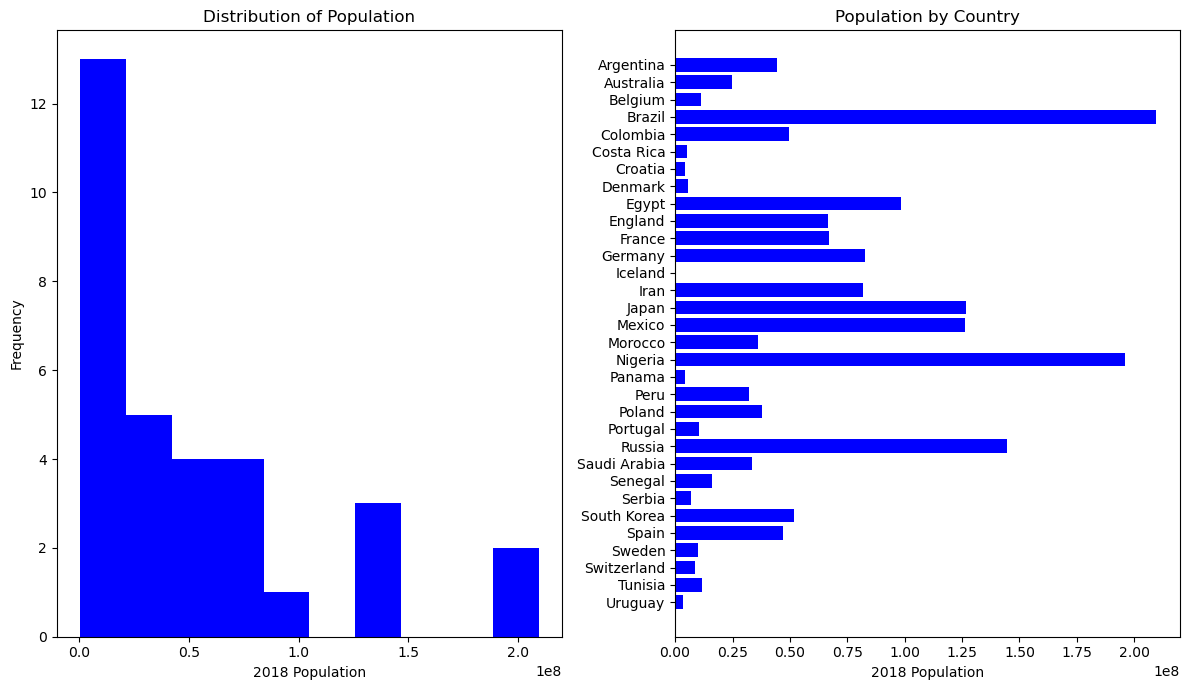

In [44]:
#plotting population
# Run this cell without changes

# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
fig.set_tight_layout(True)

# Histogram of Populations and Frequencies
ax1.hist(x=populations, color="blue")
ax1.set_xlabel("2018 Population")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Population")

# Horizontal Bar Graph of Population by Country
ax2.barh(teams[::-1], populations[::-1], color="blue")
ax2.set_xlabel("2018 Population")
ax2.set_title("Population by Country");

# 4. Analysis of Population vs. Performance

In [46]:
#Calculating correlation coefficient between populations and wins
# Run this cell without changes
np.corrcoef(wins, populations)[0][1]

0.07592816849178588

In [47]:
# Replace None with appropriate code
"""
There is a very weak, yet positive correlation coefficient 
between populations and wins, the number being so close 
to zero we can conclude that it is more likely that 
there is zero effect with population effecting football
wins.

"""

'\nThere is a very weak, yet positive correlation coefficient \nbetween populations and wins, the number being so close \nto zero we can conclude that it is more likely that \nthere is zero effect with population effecting football\nwins.\n\n'

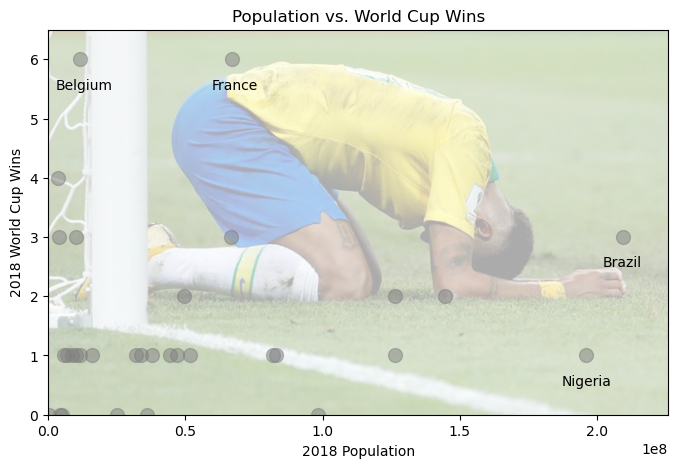

In [78]:
#scatter plot
# Run this cell without changes

# Set up figure
fig, ax = plt.subplots(figsize=(8, 5))

# Background
image = plt.imread("neymar.jpg")
ax.imshow(image, alpha=0.33, extent=[0, x+30000000, 0, y+5.5], aspect="auto")

# Basic scatter plot
ax.scatter(
    x=populations,
    y=wins,
    color="gray", alpha=0.5, s=100
)
ax.set_xlabel("2018 Population")
ax.set_ylabel("2018 World Cup Wins")
ax.set_title("Population vs. World Cup Wins")

# Add annotations for specific points of interest
highlighted_points = {
    "Belgium": 2, # Numbers are the index of that
    "Brazil": 3,  # country in populations & wins
    "France": 10,
    "Nigeria": 17
}
for country, index in highlighted_points.items():
    # Get x and y position of data point
    x = populations[index]
    y = wins[index]
    # Move each point slightly down and to the left
    # (numbers were chosen by manually tweaking)
    xtext = x - (1.25e6 * len(country))
    ytext = y - 0.5
    # Annotate with relevant arguments
    ax.annotate(
        text=country,
        xy=(x, y),
        xytext=(xtext, ytext)
    )

In [50]:
# Replace None with appropriate text
"""
The scatterplot does not showcase any strong 
trendlines which indicate that it is unlikely
population effects win in football. The teams 
in 2018 who won a lot (France) do not have the 
highest population (Brazil). This supports
the correlation coefficient calculated earlier
and slightly supports the  World Cup infopraphic, 
as Brazil a previous winnder of the World Cup 
has a high population, but not the Olympics infographic.
"""

'\nThe scatterplot does not showcase any strong \ntrendlines which indicate that it is unlikely\npopulation effects win in football. The teams \nin 2018 who won a lot (France) do not have the \nhighest population (Brazil). This supports\nthe correlation coefficient calculated earlier\nand slightly supports the  World Cup infopraphic, \nas Brazil a previous winnder of the World Cup \nhas a high population, but not the Olympics infographic.\n'

In [49]:
# Replace None with appropriate text
"""
What are your thoughts on why you may see this result?
    I'm not surprised with this result as football has
    many other variables which dictate the likelyhood
    of teams winning. Plus, as the tournament is held
    as cup-style eliminator tournament (not a league)
    there is higher variability on teams winning and 
    losing. A league where teams play each other twice
    I'd say would showcase a less skewed graph (more
    normalised) then teams winning a world cup. 
    Regarding population. I think it's not a strong 
    variable for team wins (people prefer other sports) 
    regarding population. The globalisation and capitalistic
    nature of the modern world I think have higher
    chances of determining more football wins.
What would you research next?
    For a higher coefficient correlation i would research:
    GDP vs football wins
    Weather (temperature/huminidy) vs football wins
    Population of football players vs football wins
    
"""

"\nWhat are your thoughts on why you may see this result?\n    I'm not surprised with this result as football has\n    many other variables which dictate the likelyhood\n    of teams winning. Plus, as the tournament is held\n    as cup-style eliminator tournament (not a league)\n    there is higher variability on teams winning and \n    losing. A league where teams play each other twice\n    I'd say would showcase a less skewed graph (more\n    normalised) then teams winning a world cup. \n    Regarding population. I think it's not a strong \n    variable for team wins (people prefer other sports) \n    regarding population. The globalisation and capitalistic\n    nature of the modern world I think have higher\n    chances of determining more football wins.\nWhat would you research next?\n    For a higher coefficient correlation i would research:\n    GDP vs football wins\n    Weather (temperature/huminidy) vs football wins\n    Population of football players vs football wins\n    \n"